In [19]:
!pip install finance-datareader

In [2]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
# 삼성전자 주식 코드: 005930
# 2007년 1월 1일부터 2022년 12월 31일까지의 삼성전자 주식 데이터를 불러옵니다.
df = fdr.DataReader('005930', '2007-01-01', '2022-12-31')


print(df.head())
print(df.tail())

             Open   High    Low  Close  Volume    Change
Date                                                    
2007-01-02  12400  12540  12320  12500  355265  0.019576
2007-01-03  12540  12560  12220  12220  394730 -0.022400
2007-01-04  12220  12240  12060  12140  381464 -0.006547
2007-01-05  12160  12180  11900  11900  586649 -0.019769
2007-01-08  11840  11880  11580  11640  682494 -0.021849
             Open   High    Low  Close    Volume    Change
Date                                                      
2022-12-23  58200  58400  57700  58100   9829407 -0.016920
2022-12-26  58000  58100  57700  57900   6756411 -0.003442
2022-12-27  58000  58400  57900  58100  10667027  0.003454
2022-12-28  57600  57600  56400  56600  14665410 -0.025818
2022-12-29  56000  56200  55300  55300  11295935 -0.022968


In [3]:
# 2023년 1월 1일부터 최근까지의 삼성전자 주식 데이터를 불러옵니다.
df_2023 = fdr.DataReader('005930', '2023-01-01', '2023-12-31')

# 데이터 확인
print(df_2023.head())
print(df_2023.tail())

             Open   High    Low  Close    Volume    Change
Date                                                      
2023-01-02  55500  56100  55200  55500  10031448  0.003617
2023-01-03  55400  56000  54500  55400  13547030 -0.001802
2023-01-04  55700  58000  55600  57800  20188071  0.043321
2023-01-05  58200  58800  57600  58200  15682826  0.006920
2023-01-06  58300  59400  57900  59000  17334989  0.013746
             Open   High    Low  Close    Volume    Change
Date                                                      
2023-12-21  74600  75000  74300  75000  13478766  0.002674
2023-12-22  75800  76300  75400  75900  14515608  0.012000
2023-12-26  76100  76700  75700  76600  13164909  0.009223
2023-12-27  76700  78000  76500  78000  20651042  0.018277
2023-12-28  77700  78500  77500  78500  17797536  0.006410


In [4]:
# 결측치 확인
print(df.isnull().sum())

# 결측치 처리 예시 (결측치가 있다면)
df.fillna(df.mean(), inplace=True)       # 평균값으로 채우기

df_2023.fillna(df_2023.mean(), inplace=True)
# 특성 생성 예시
# 이동 평균선 추가
df['MA10'] = df['Close'].rolling(window=10).mean()  # 10일 이동 평균선
df['MA30'] = df['Close'].rolling(window=30).mean()  # 30일 이동 평균선
df['MA10'].fillna(df['Close'].mean(), inplace=True)  # 전체 'Close' 열의 평균값으로 NaN 채우기
df['MA30'].fillna(df['Close'].mean(), inplace=True)  # 전체 'Close' 열의 평균값으로 NaN 채우기
# 이동 평균선이 계산된 데이터 확인
print(df.head(35))

# 결측치가 있는 행 제거
df.dropna(inplace=True)

# 2023년 데이터에 대해서도 동일한 전처리 수행
df_2023['MA10'] = df_2023['Close'].rolling(window=10).mean()
df_2023['MA30'] = df_2023['Close'].rolling(window=30).mean()
df_2023.dropna(inplace=True)

# 전처리된 데이터 확인
print(df.head())
print(df_2023.head())


Open      0
High      0
Low       0
Close     0
Volume    0
Change    0
dtype: int64
             Open   High    Low  Close  Volume    Change          MA10  \
Date                                                                     
2007-01-02  12400  12540  12320  12500  355265  0.019576  33952.553729   
2007-01-03  12540  12560  12220  12220  394730 -0.022400  33952.553729   
2007-01-04  12220  12240  12060  12140  381464 -0.006547  33952.553729   
2007-01-05  12160  12180  11900  11900  586649 -0.019769  33952.553729   
2007-01-08  11840  11880  11580  11640  682494 -0.021849  33952.553729   
2007-01-09  11740  11880  11640  11720  402197  0.006873  33952.553729   
2007-01-10  11640  11680  11500  11560  522576 -0.013652  33952.553729   
2007-01-11  11580  11760  11560  11640  613040  0.006920  33952.553729   
2007-01-12  11800  12120  11700  12060  826085  0.036082  33952.553729   
2007-01-15  12240  12300  12140  12240  673506  0.014925  11962.000000   
2007-01-16  12300  12300  1

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# RSI 계산 함수
def calculate_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# MACD 계산 함수
def calculate_macd(data, slow=26, fast=12):
    exp1 = data.ewm(span=fast, adjust=False).mean()
    exp2 = data.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    signal = macd.ewm(span=9, adjust=False).mean()
    return macd, signal

# OBV 계산 함수
def calculate_obv(close, volume):
    df = pd.DataFrame({'close': close, 'volume': volume})
    df['direction'] = df['close'].diff()
    df['direction'] = df['direction'].apply(lambda x: 1 if x > 0 else -1 if x < 0 else 0)
    df['obv'] = (df['volume'] * df['direction']).cumsum()
    return df['obv']

# RSI, MACD, OBV 계산 및 데이터프레임에 추가
df['RSI'] = calculate_rsi(df['Close'])
macd, signal = calculate_macd(df['Close'])
df['MACD'] = macd
df['MACD_Signal'] = signal
df['OBV'] = calculate_obv(df['Close'], df['Volume'])

df_2023['RSI'] = calculate_rsi(df_2023['Close'])
df_2023['MACD'], df_2023['MACD_Signal'] = calculate_macd(df_2023['Close'])
df_2023['OBV'] = calculate_obv(df_2023['Close'], df_2023['Volume'])

# 결측치 제거
df.dropna(inplace=True)
df_2023.dropna(inplace=True)

In [6]:
df_2023.head()

,Open,High,Low,Close,Volume,Change,MA10,MA30,RSI,MACD,MACD_Signal,OBV
Date,,,,,,,,,,,,
2023-03-06,61100,61600,60800,61500,13630602,0.016529,61310.0,62290.000000,40.860215,-612.295579,-470.969903,4397401
2023-03-07,61400,61400,60700,60700,11473280,-0.013008,61110.0,62263.333333,37.623762,-629.565581,-502.689039,-7075879
2023-03-08,60100,60500,59900,60300,14161857,-0.006590,60930.0,62213.333333,40.000000,-667.830505,-535.717332,-21237736
2023-03-09,60500,60800,59900,60100,14334499,-0.003317,60830.0,62103.333333,28.048780,-706.153958,-569.804657,-35572235
2023-03-10,59500,59700,59100,59500,11902471,-0.009983,60580.0,61956.666667,29.870130,-775.995365,-611.042799,-47474706


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# 10일 및 30일 이동 평균선 계산
df['MA10'] = df['Close'].rolling(window=10).mean()
df['MA30'] = df['Close'].rolling(window=30).mean()

df_2023['MA10'] = df_2023['Close'].rolling(window=10).mean()
df_2023['MA30'] = df_2023['Close'].rolling(window=30).mean()

# 볼린저 밴드 계산
window = 20
df['SMA20'] = df['Close'].rolling(window=window).mean()  # 중심선: 20일 이동 평균
df['STD20'] = df['Close'].rolling(window=window).std()   # 20일 이동 표준편차
df['Upper_Band'] = df['SMA20'] + (df['STD20'] * 2)       # 상단 밴드
df['Lower_Band'] = df['SMA20'] - (df['STD20'] * 2)       # 하단 밴드


window = 10
df_2023['SMA20'] = df_2023['Close'].rolling(window=window).mean()  # 중심선: 20일 이동 평균
df_2023['STD20'] = df_2023['Close'].rolling(window=window).std()   # 20일 이동 표준편차
df_2023['Upper_Band'] = df_2023['SMA20'] + (df_2023['STD20'] * 2)       # 상단 밴드
df_2023['Lower_Band'] = df_2023['SMA20'] - (df_2023['STD20'] * 2)       # 하단 밴드

# 결측치 제거
df.dropna(inplace=True)
df_2023.dropna(inplace=True)

# 스케일링
scaler = StandardScaler()

# 스케일링할 컬럼 선택: 새로 계산된 지표 포함
columns_to_scale = df.columns.drop(['Volume'])  # 'Volume' 제외

columns_to_scale_2023 = df_2023.columns.drop(['Volume'])  # 'Volume' 제외
# 데이터 스케일링 및 원본 DataFrame에 결과 저장
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df_2023[columns_to_scale] = scaler.fit_transform(df_2023[columns_to_scale_2023])

# 스케일링된 데이터 확인
print(df.head())
print(df_2023.head())

                Open      High       Low     Close  Volume    Change  \
Date                                                                   
2007-03-05 -1.138134 -1.135590 -1.131642 -1.140619  551685 -0.318212   
2007-03-06 -1.135154 -1.128693 -1.127635 -1.134650  581082  0.545980   
2007-03-07 -1.125222 -1.131649 -1.127635 -1.133655  533148  0.064009   
2007-03-08 -1.130188 -1.125738 -1.125632 -1.129676  581132  0.348872   
2007-03-09 -1.117277 -1.118842 -1.112611 -1.117737  624981  1.101008   

                MA10      MA30       RSI      MACD  MACD_Signal       OBV  \
Date                                                                        
2007-03-05 -1.116960 -1.114172 -0.758558 -0.281382    -0.247684 -0.266443   
2007-03-06 -1.119051 -1.114704 -0.205396 -0.291560    -0.260036 -0.262505   
2007-03-07 -1.122038 -1.115402  0.164405 -0.295320    -0.270715 -0.258891   
2007-03-08 -1.125224 -1.116134  0.132558 -0.287138    -0.277524 -0.254953   
2007-03-09 -1.126817 -1.116633  0

In [8]:
# 독립 변수(X)와 종속 변수(y)를 정의합니다.
X_train = df.drop(['Close'], axis=1)  # 'Close'는 종속 변수이므로 제거합니다.
y_train = df['Close']  # 'Close' 가격을 종속 변수로 사용합니다.

# 학습 데이터셋을 준비합니다.
# X_test, y_test는 이미 df_2023 데이터에서 준비된 것으로 가정합니다.

# 모델 초기화
linear_model = LinearRegression()
ridge_model = Ridge()
lasso_model = Lasso()
random_forest_model = RandomForestRegressor()

# 모델 학습
linear_model.fit(X_train, y_train)
ridge_model.fit(X_train,y_train)
lasso_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

X_test = df_2023.drop(['Close'], axis=1)
y_test = df_2023['Close']

y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)
y_pred_rf = random_forest_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_rf = mean_squared_error(y_test, y_pred_rf)

r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Linear Regression MSE: {mse_linear}, R2: {r2_linear}")
print(f"Ridge Regression MSE: {mse_ridge}, R2: {r2_ridge}")
print(f"Lasso Regression MSE: {mse_lasso}, R2: {r2_lasso}")
print(f"Random Forest MSE: {mse_rf}, R2: {r2_rf}")

C:\Users\tndud\anaconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:211: LinAlgWarning: Ill-conditioned matrix (rcond=2.28136e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Linear Regression MSE: 0.17809598334726343, R2: 0.8219040166527366
Ridge Regression MSE: 0.17359705728402045, R2: 0.8264029427159796
Lasso Regression MSE: 1.6095067278010347, R2: -0.6095067278010347
Random Forest MSE: 0.06807472499581385, R2: 0.9319252750041862


In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# 튜닝할 하이퍼파라미터 그리드 설정
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Random Forest 모델 초기화
rf = RandomForestRegressor(random_state=42)

# RandomizedSearchCV 객체 생성
rf_random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions, 
                                      n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# RandomizedSearchCV를 사용한 하이퍼파라미터 튜닝 실행
rf_random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터와 그때의 성능
best_params = rf_random_search.best_params_
best_score = rf_random_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score: {best_score}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
Best score: -0.7996102722342604


In [10]:
# 최적의 하이퍼파라미터로 Random Forest 모델 초기화
optimal_rf = RandomForestRegressor(
    n_estimators=100,
    min_samples_split=2,
    min_samples_leaf=1,
    max_depth=40,
    bootstrap=True,
    random_state=42
)

# 최적화된 모델을 학습 데이터에 적합
optimal_rf.fit(X_train, y_train)

# 2023년 데이터에 대한 예측 수행
y_pred_2023 = optimal_rf.predict(X_test)

# 2023년 데이터에 대한 성능 평가
mse_2023 = mean_squared_error(y_test, y_pred_2023)
r2_2023 = r2_score(y_test, y_pred_2023)

print(f"2023년 데이터에 대한 MSE: {mse_2023}")
print(f"2023년 데이터에 대한 R2: {r2_2023}")


2023년 데이터에 대한 MSE: 0.06768774250037218
2023년 데이터에 대한 R2: 0.9323122574996279


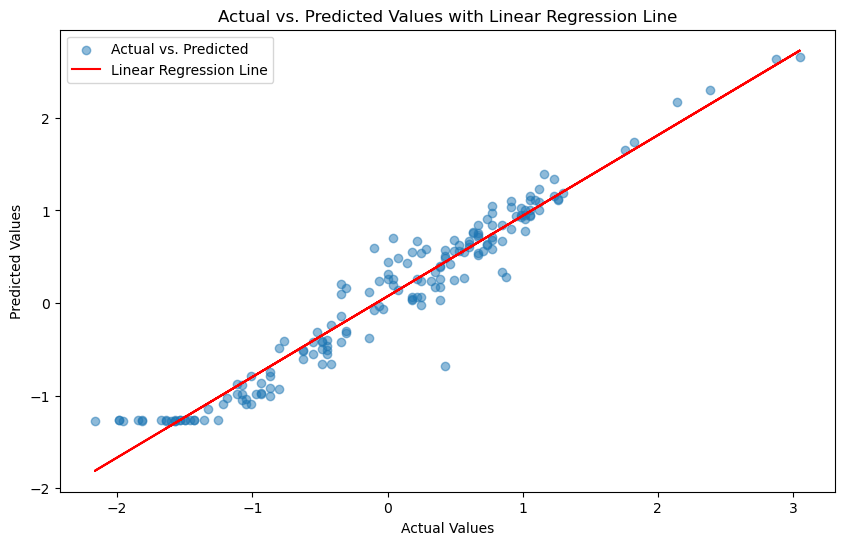

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# 실제 값과 예측 값을 산점도로 표시
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_2023, alpha=0.5, label='Actual vs. Predicted')

# 선형 회귀선 추가
z = np.polyfit(y_test, y_pred_2023, 1)
p = np.poly1d(z)
plt.plot(y_test, p(y_test), color='red', label='Linear Regression Line')

# 그래프 제목 및 축 레이블 설정
plt.title('Actual vs. Predicted Values with Linear Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# 범례 표시
plt.legend()

# 그래프 보여주기
plt.show()